## Import Library dan Mengubah Parameter Matpotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# 1. Load Dataset

In [ ]:
df = pd.read_csv('train.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 2. Descriptive Analysis

### a. Melihat Informasi Tiap Kolom & Missing Value 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum() # Melakukan pengecekan apakah terdapat missing values pada features

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dari informasi data diatas didapatkan bahwa tidak nilai null atau missing value pada setiap kolom/fitur

### b. Sampling Terhadap Dataset

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12717,51,self-employed,married,secondary,yes,34,no,yes,cellular,7,jul,200,1,-1,0,unknown,no
3089,48,technician,single,secondary,no,9131,yes,no,unknown,14,may,902,5,-1,0,unknown,no
6535,27,admin.,single,secondary,no,349,yes,no,unknown,27,may,165,3,-1,0,unknown,no
18963,56,blue-collar,married,secondary,no,302,no,yes,cellular,4,aug,378,2,-1,0,unknown,no
23753,30,management,single,tertiary,no,0,no,no,cellular,28,aug,62,7,-1,0,unknown,no


### c. Pengelompokan Tiap Features Terhadap Type Data (Categorical, Numeric)

In [ ]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
df[num].describe() # Melakukan pengecekan informasi pada type data numerical

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df[cat].describe() # Melakukan pengecekan informasi pada type data categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Jumlah data unik pada fitur job, month cukup banyak sehingga nantinya perlu dilakukan encoding pada tahap preprocessing

### d. Value Counting (categoricals)

In [ ]:
for col in cat:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df[col].value_counts(), '\n')

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

# 3. Univariate Analysis

### a. Individual Boxplots (Numerical)

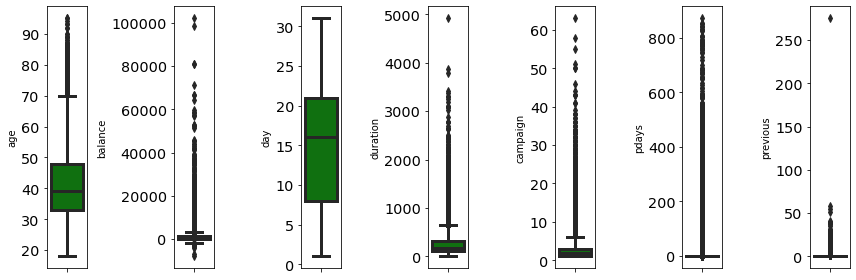

In [ ]:
features = num
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

### b. Individual Displots (Numerical)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

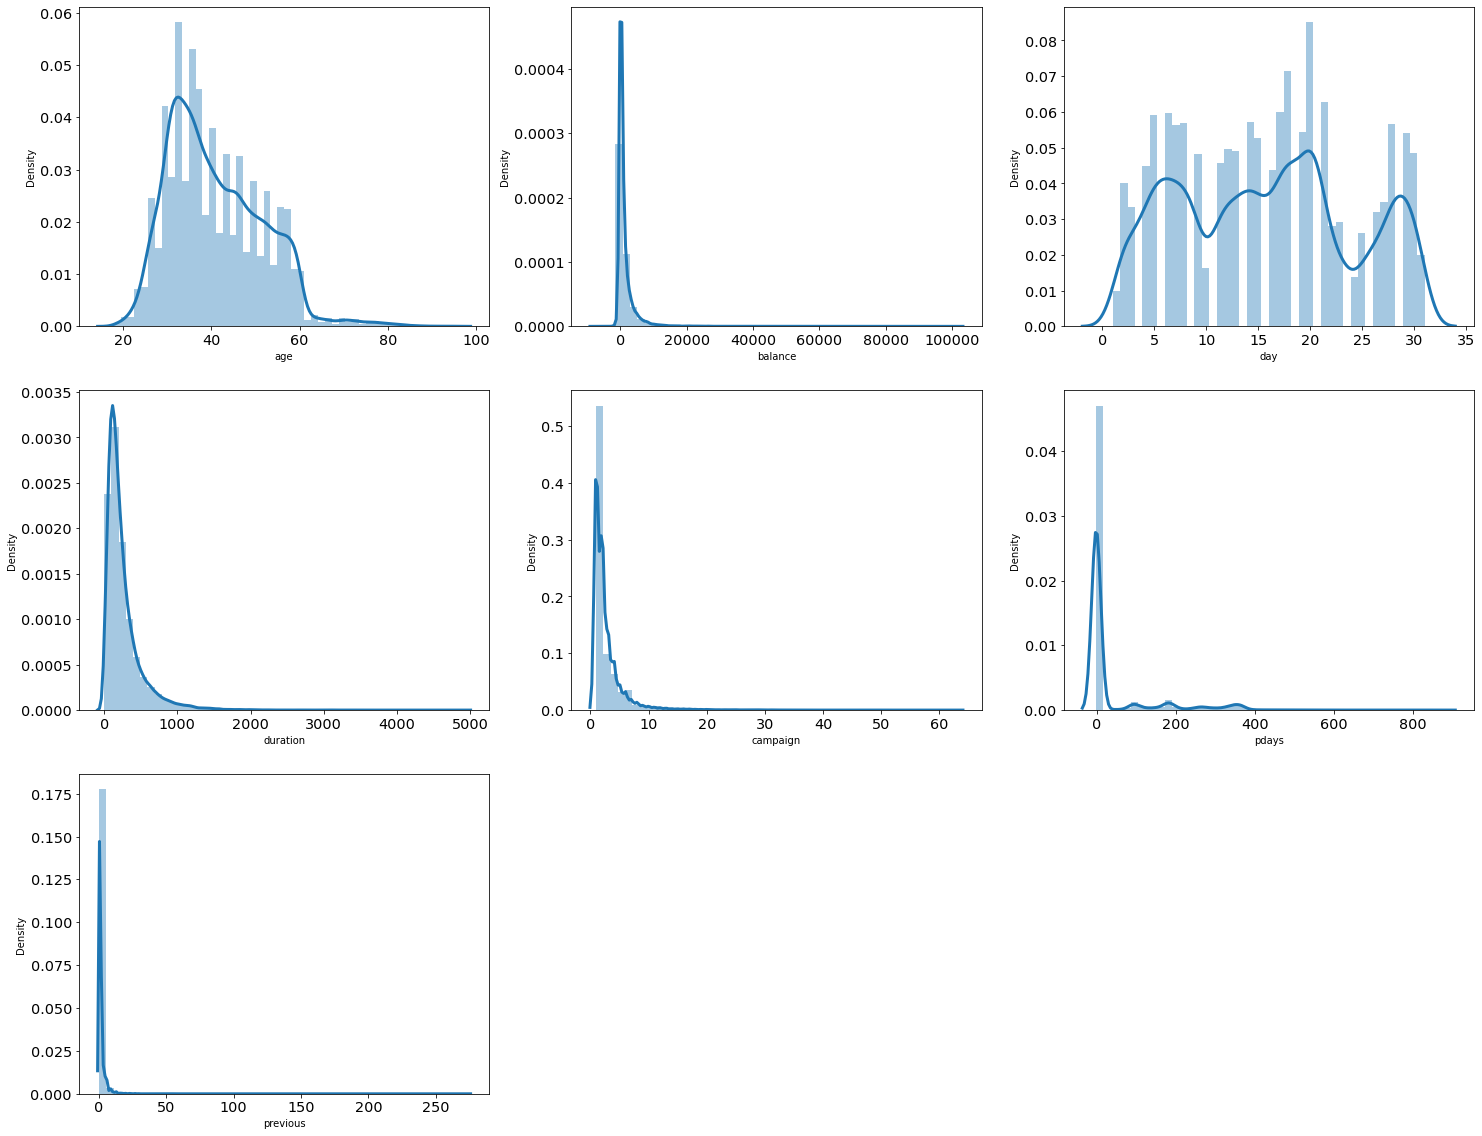

In [ ]:
plt.figure(figsize=(25,20))
for i in enumerate(df.describe().columns):
  plt.subplot(3,3,i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

distribusi data numeric umumnya adalah positively skewed, hanya fitur umur 
memiliki distribusi yang hampir menyerupai distribusi normal



*   Setelah melakukan Univariate Analysis, kita dapati bahwa data mengandung banyak sekali outliers. Hal tersebut dapat dibuktikan dengan pola persebaran di boxplot dan violin plot data banyak terkonsentrasi di Quantil 1 (Q1)
*   Dari informasi distplot juga kita dapat buktikan bahwa hampir semua diagram positively skewed. Sesuai asumsi awal bahwa nilai mean lebih besar daripada median, sehingga hal yang perlu kita persiapkan pada saat data processing adalah menghilangkan outliers dan normalisasi data



### c. Individual Violin Plots (Numerical)

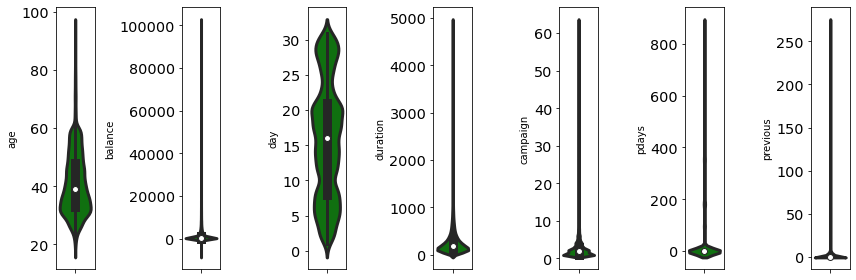

In [ ]:
features = num
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]], color = 'green')
    plt.tight_layout()

### d. Individual Countplot (Categorical)

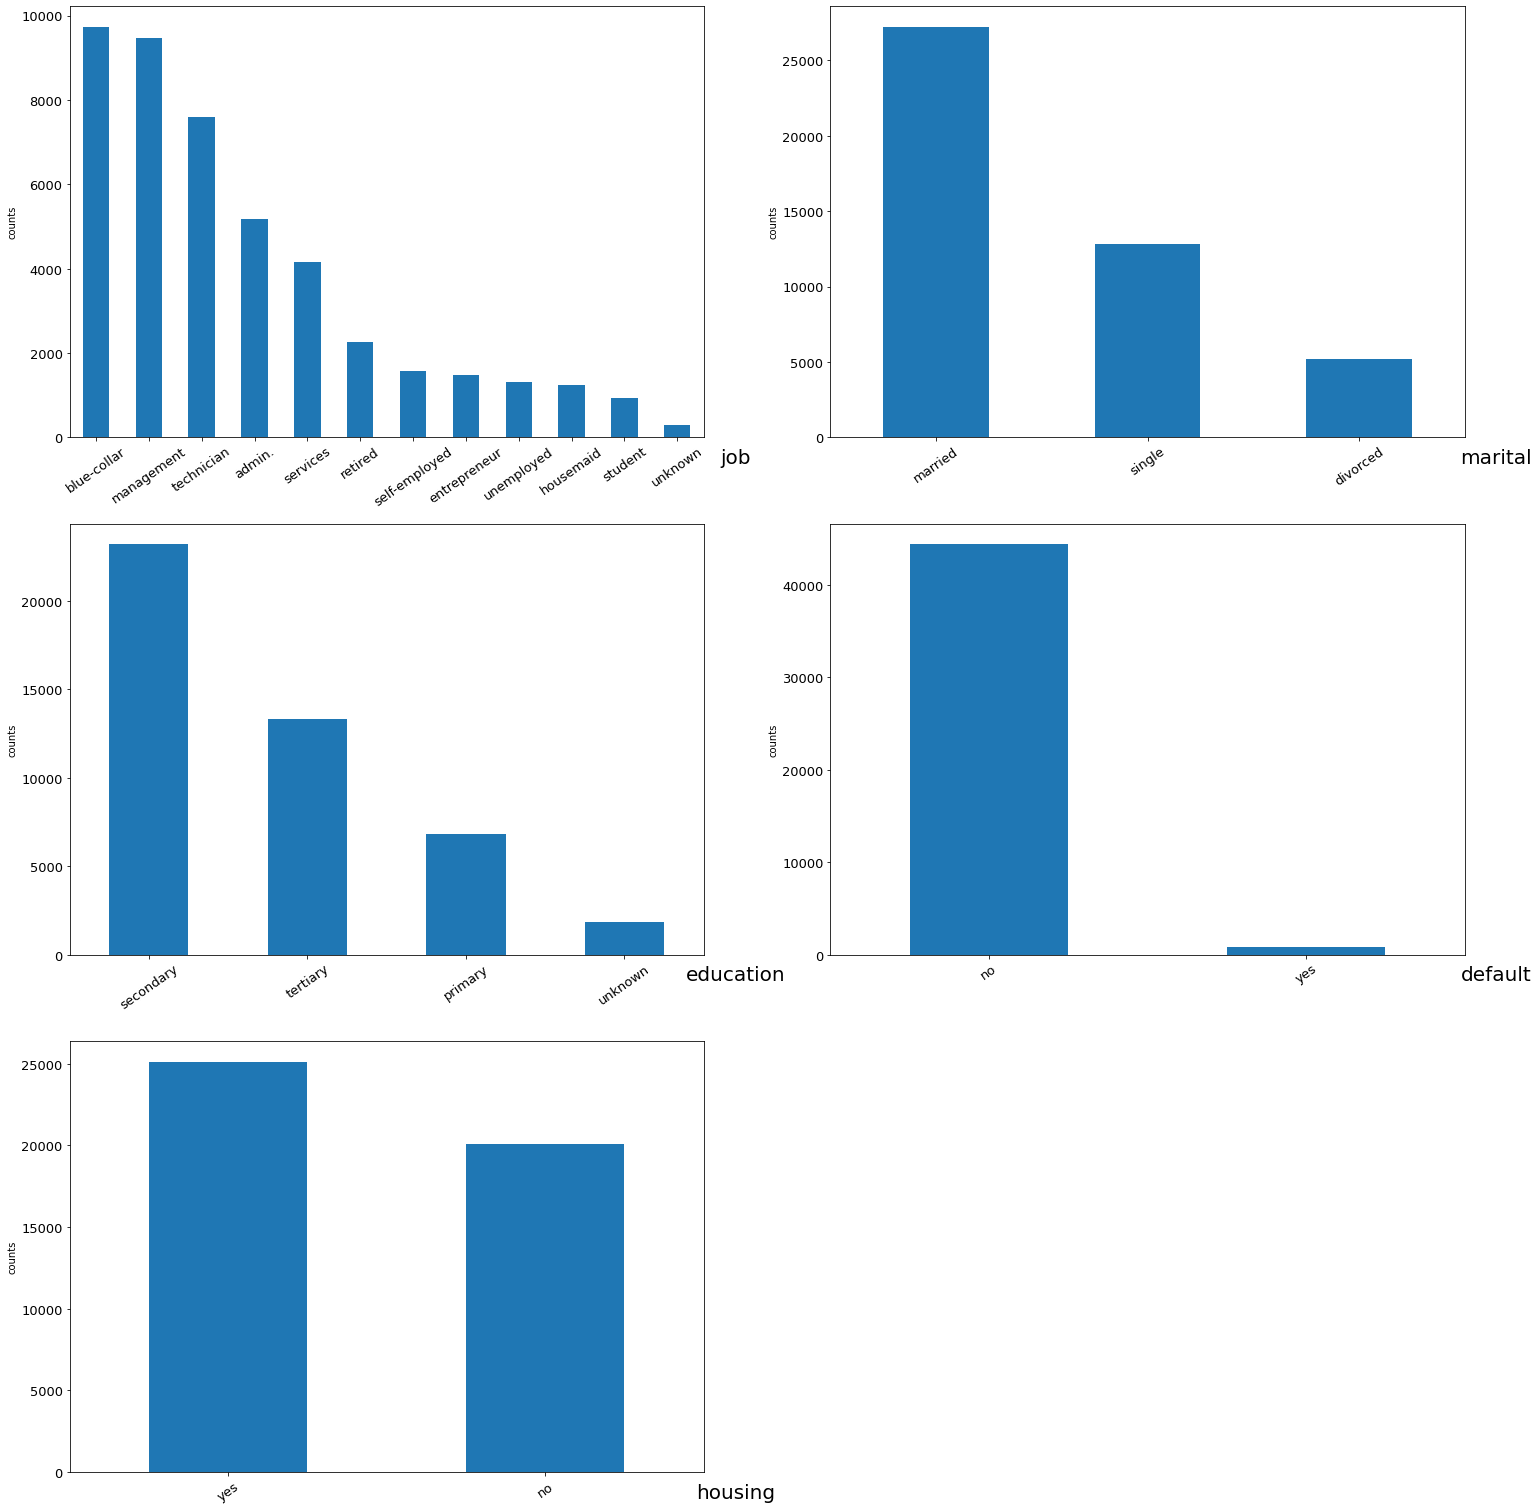

In [ ]:
fig = plt.figure(figsize=(25,46))
for r in range(0,5):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[cat[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

### e. Target Plot

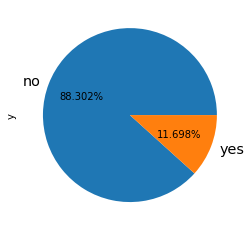

In [ ]:
df.y.value_counts().plot(x=None, y=None, kind='pie',autopct='%1.3f%%')

sebaran pada target terlihat timpang/imbalanced karena jumlah user yang membuka deposite dan yang tidak sangat berbeda jauh, hal tersebut dapat mempengaruhi proses pembuatan model.

# 4. Multivariate Analysis

### a. Correlation Heatmap (Numerical)

In [ ]:
df.corr() # Melihat bagaimana korelasi pada features berkategori numerical

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


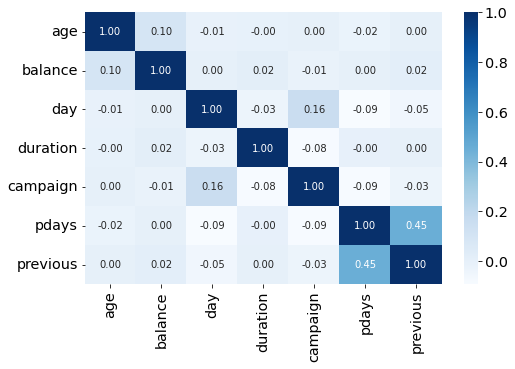

In [ ]:
plt.figure(figsize=(8, 5)) # Melihat korelasi menggunakan heatmap
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

nilai korelasi setiap fitur pada grafik heatmap sangat kecil, menunjukkan bahwa tidak ada nilai korelasi postif/negatif yang terlalu signifikan (nilai mendekati 1/-1) pada setiap fiturnya. 

### b. Pair Plots (Numerical)

<Figure size 2160x2160 with 0 Axes>

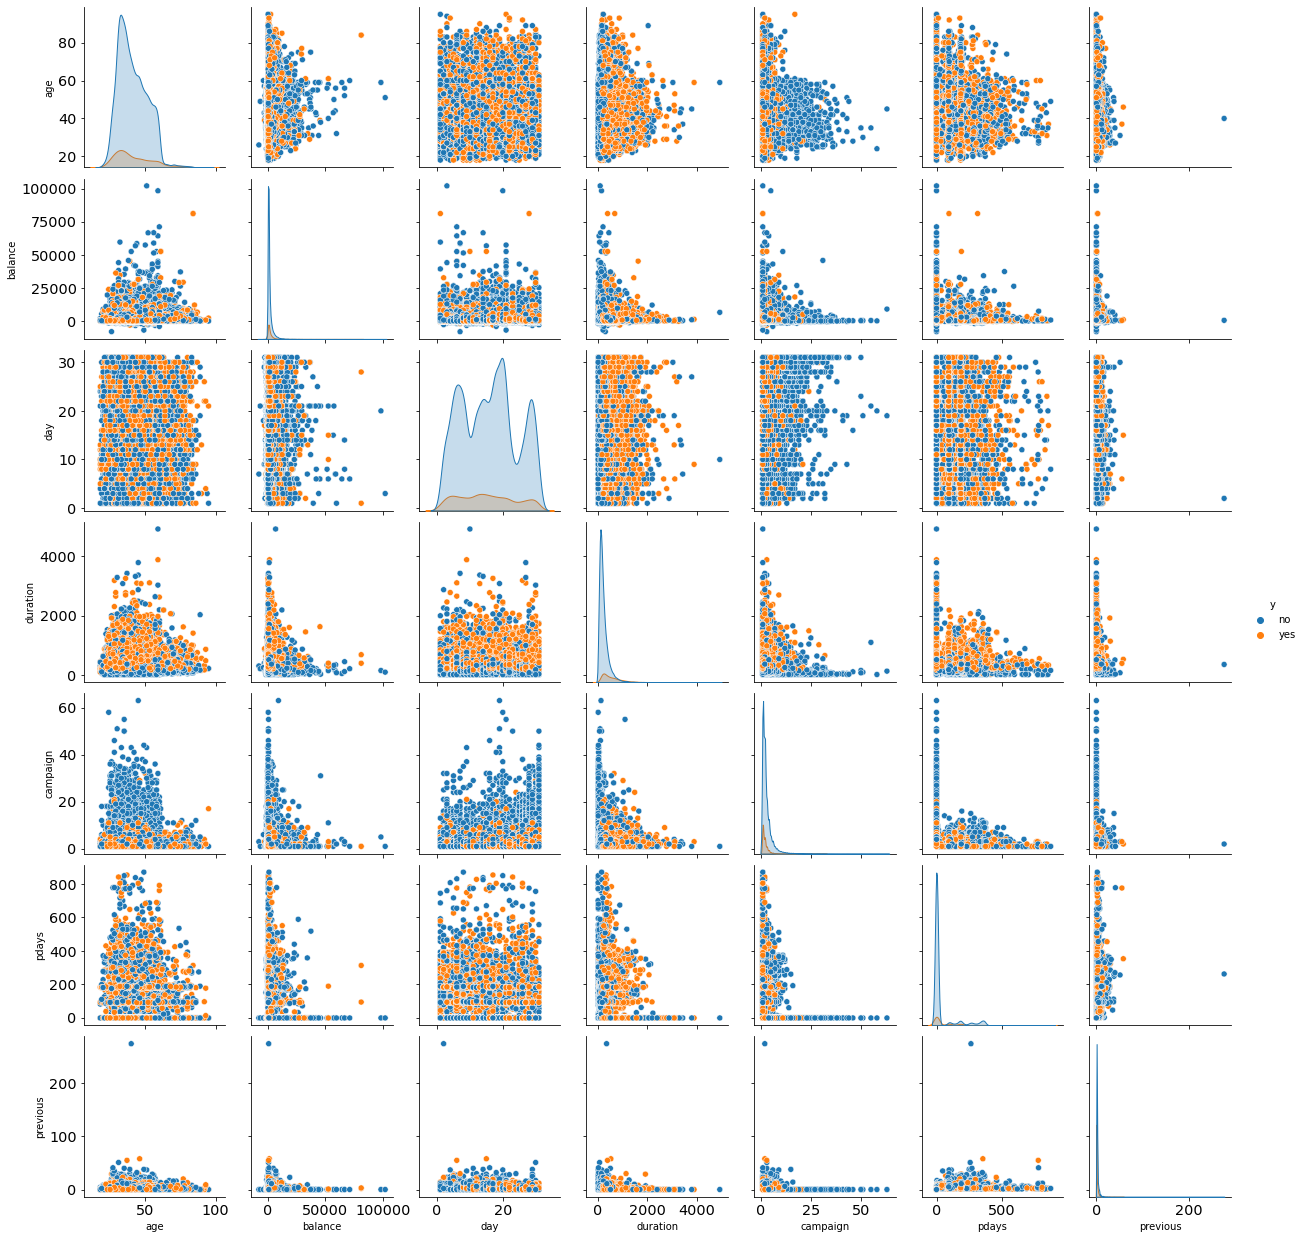

In [ ]:
plt.figure(figsize=(30, 30)) # Membuat pair plots pada type data numerical
sns.pairplot(df, diag_kind='kde', hue = 'y')
plt.show()


*   Berdasarkan multivariate analysis, banyak kecenderungan relasi negatif. Contohnya pada kasus relasi antara campaign dan duration yang memiliki korelasi negatif. Hal tersebut dapat dilihat bahwa terjadinya campaign yang banyak, namun durasi sedikit. tentu ada pertimbangan bisnis dalam hal tersebut.
*   dari grafik pairplot 'campaign' dapat dilihat bahwa user yang tidak membuka deposit adalah yang intensitas campaign/penawarannya terlalu sering









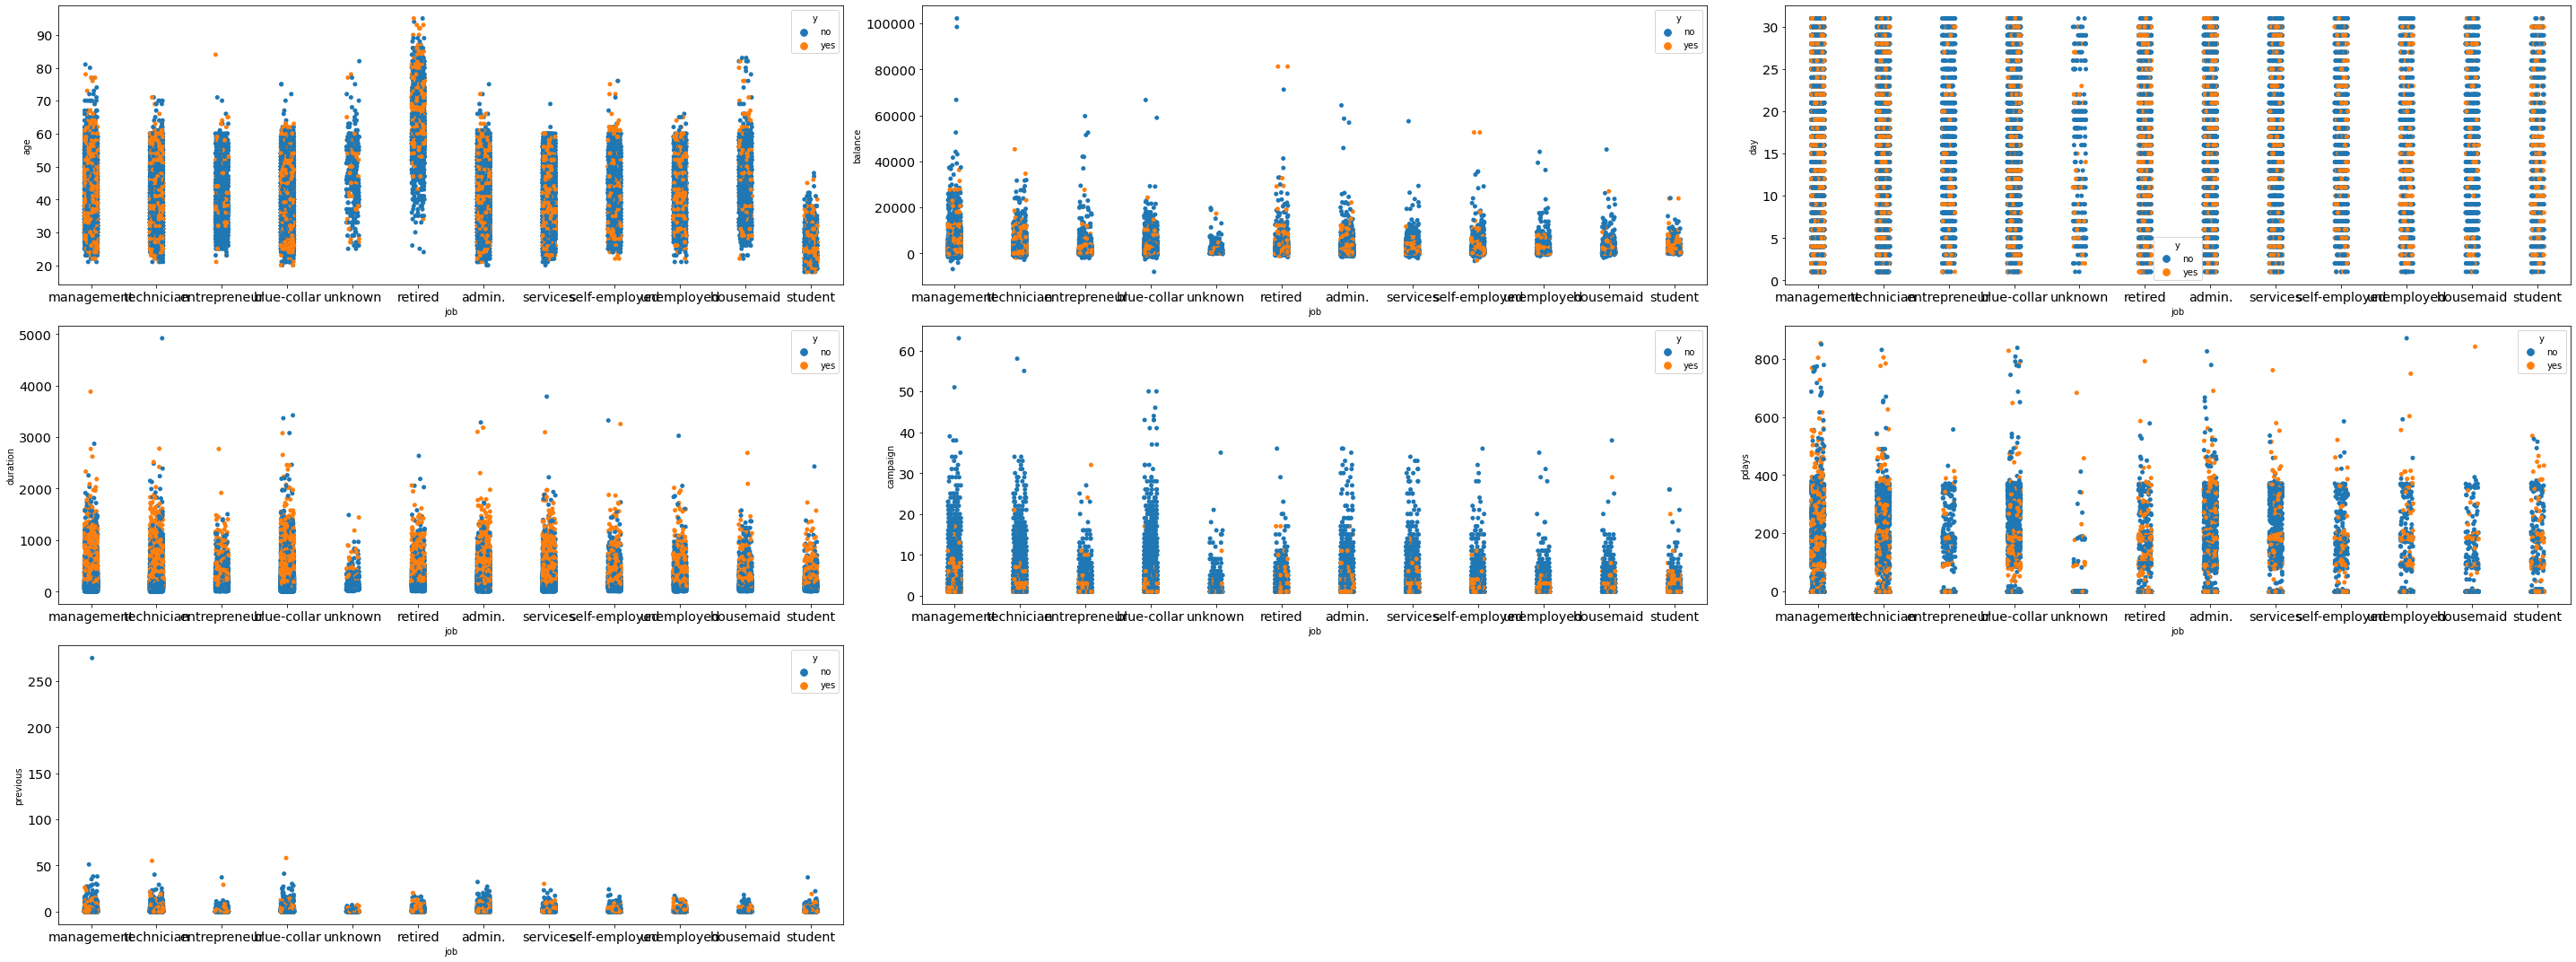

In [ ]:
# Persebaran setiap kolom vs Jobs
fig = plt.figure(figsize=(40, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='job', y=num[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()



*   user yang bekerja sebagai entrepeneur,self-employed,housemaid bekisar umur 20-60 tidak banyak yang membuka deposito sedangakan yang cukup banyak membuka deposito adalah user yang bekerja sebagai management. Disamping itu, user yang berumur > 60 tahun dengan status Retired juga dapat menjadi target pada campaign karena possibility dalam membuka deposito menunjukkan tren positif.
*   user yang membuka deposito rata-rata memilikin balance/saldo dibawah 20000 euro





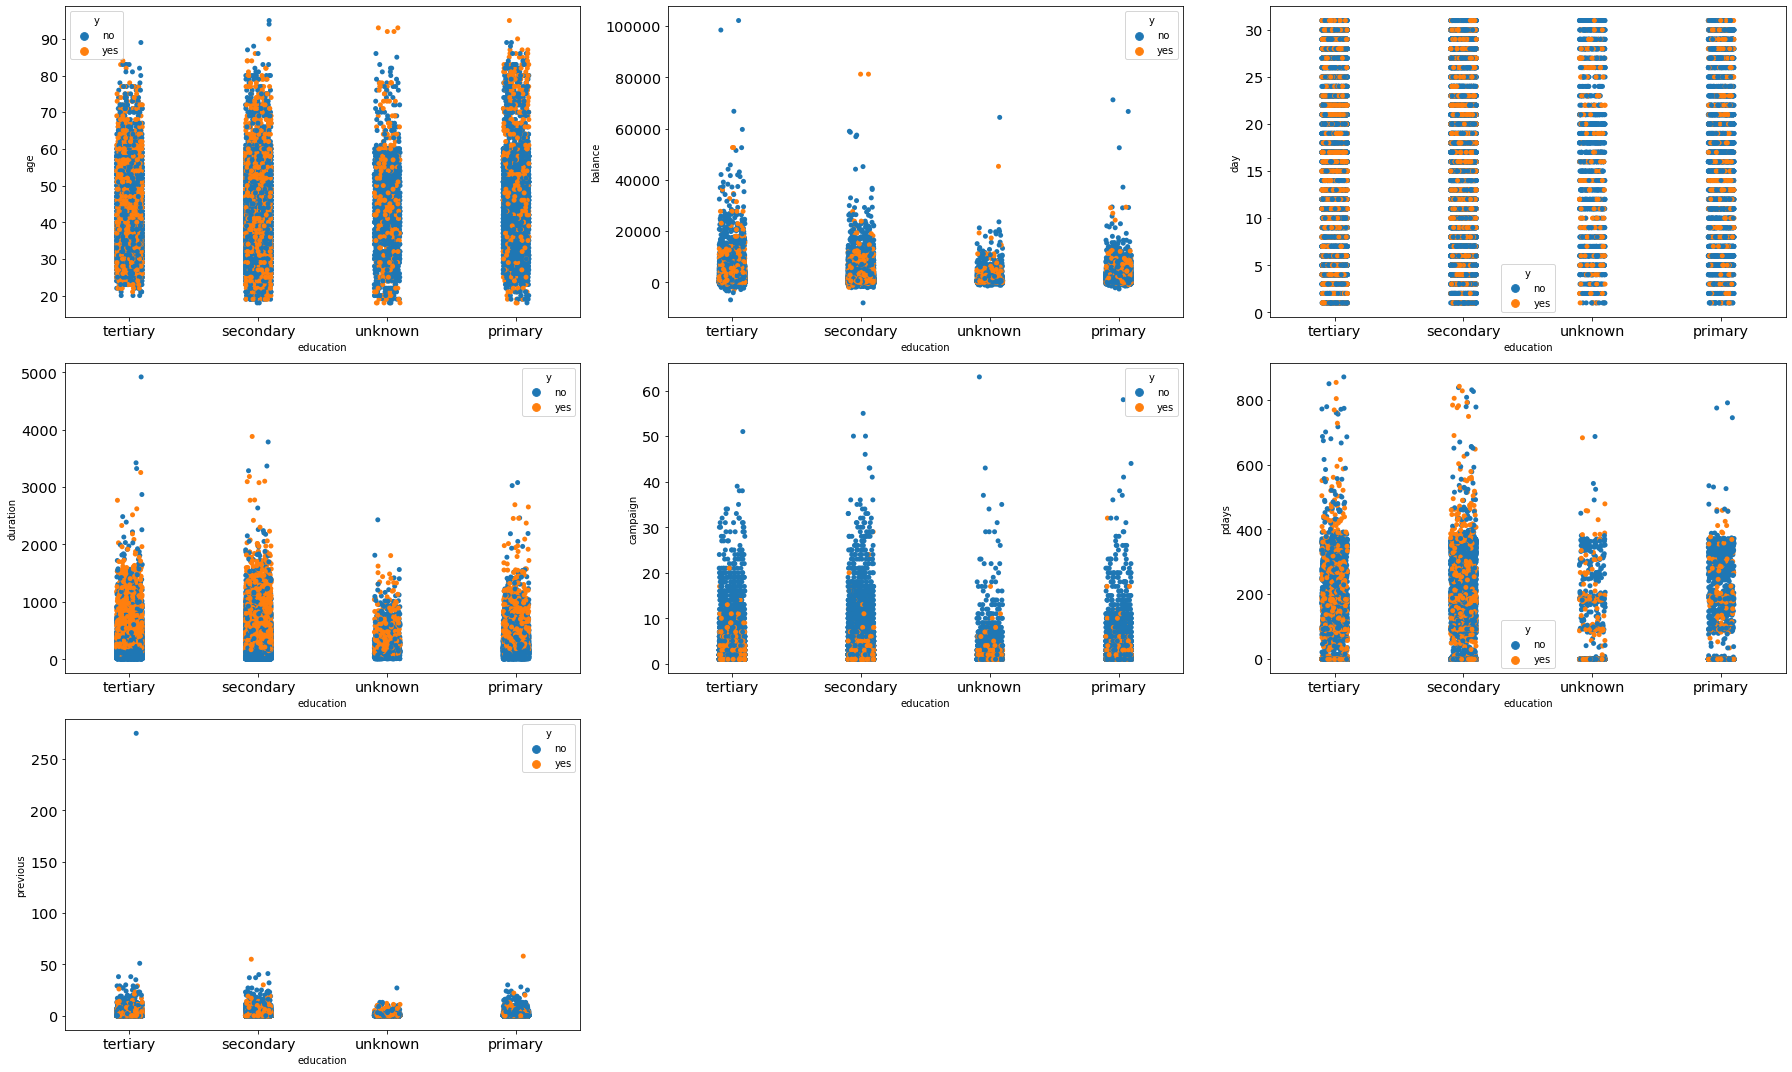

In [ ]:
# Persebaran setiap kolom vs Education
fig = plt.figure(figsize=(25, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='education', y=num[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

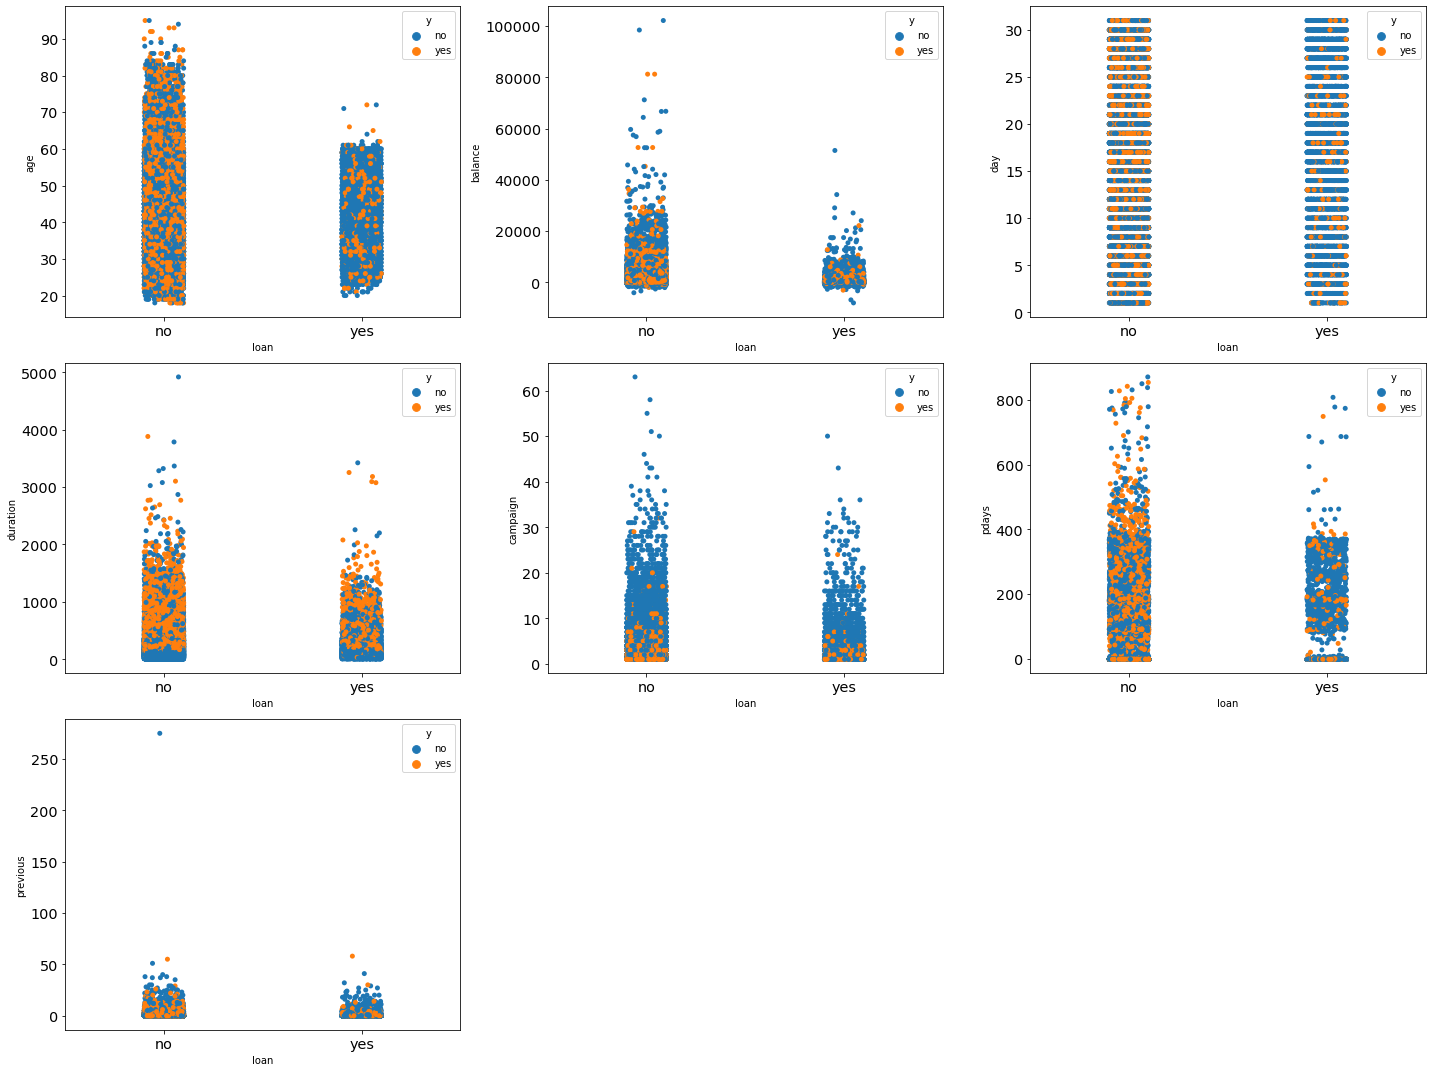

In [ ]:
# Persebaran setiap kolom vs Loan
fig = plt.figure(figsize=(20, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='loan', y=num[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

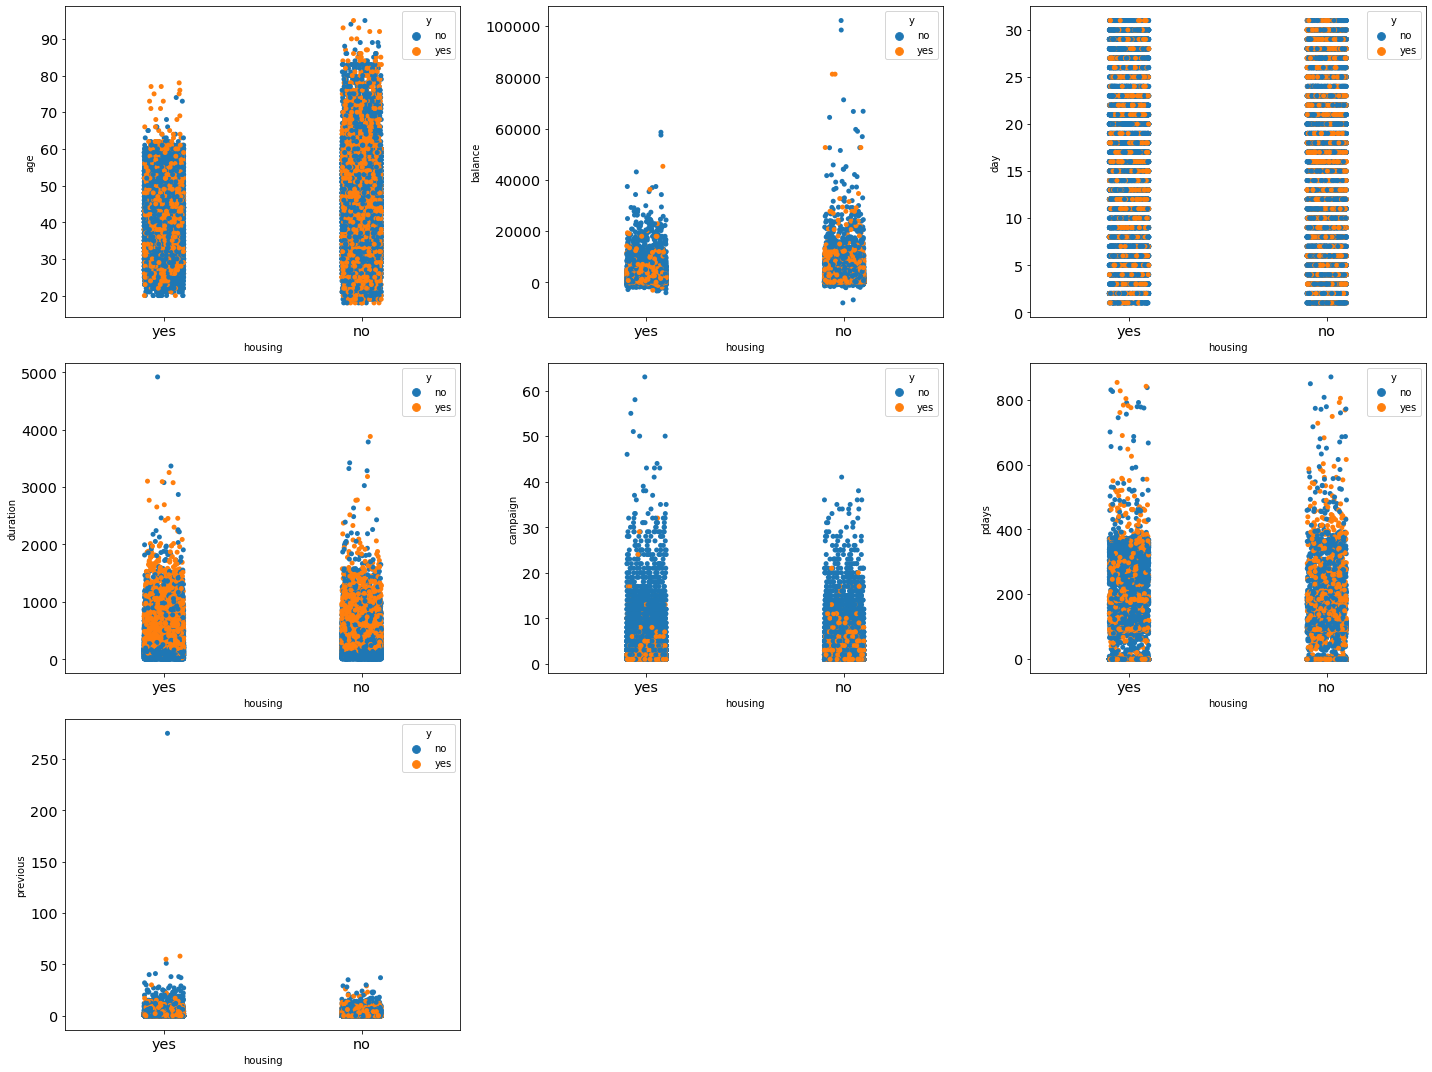

In [ ]:
# Persebaran setiap kolom vs Housing
fig = plt.figure(figsize=(20, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='housing', y=num[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

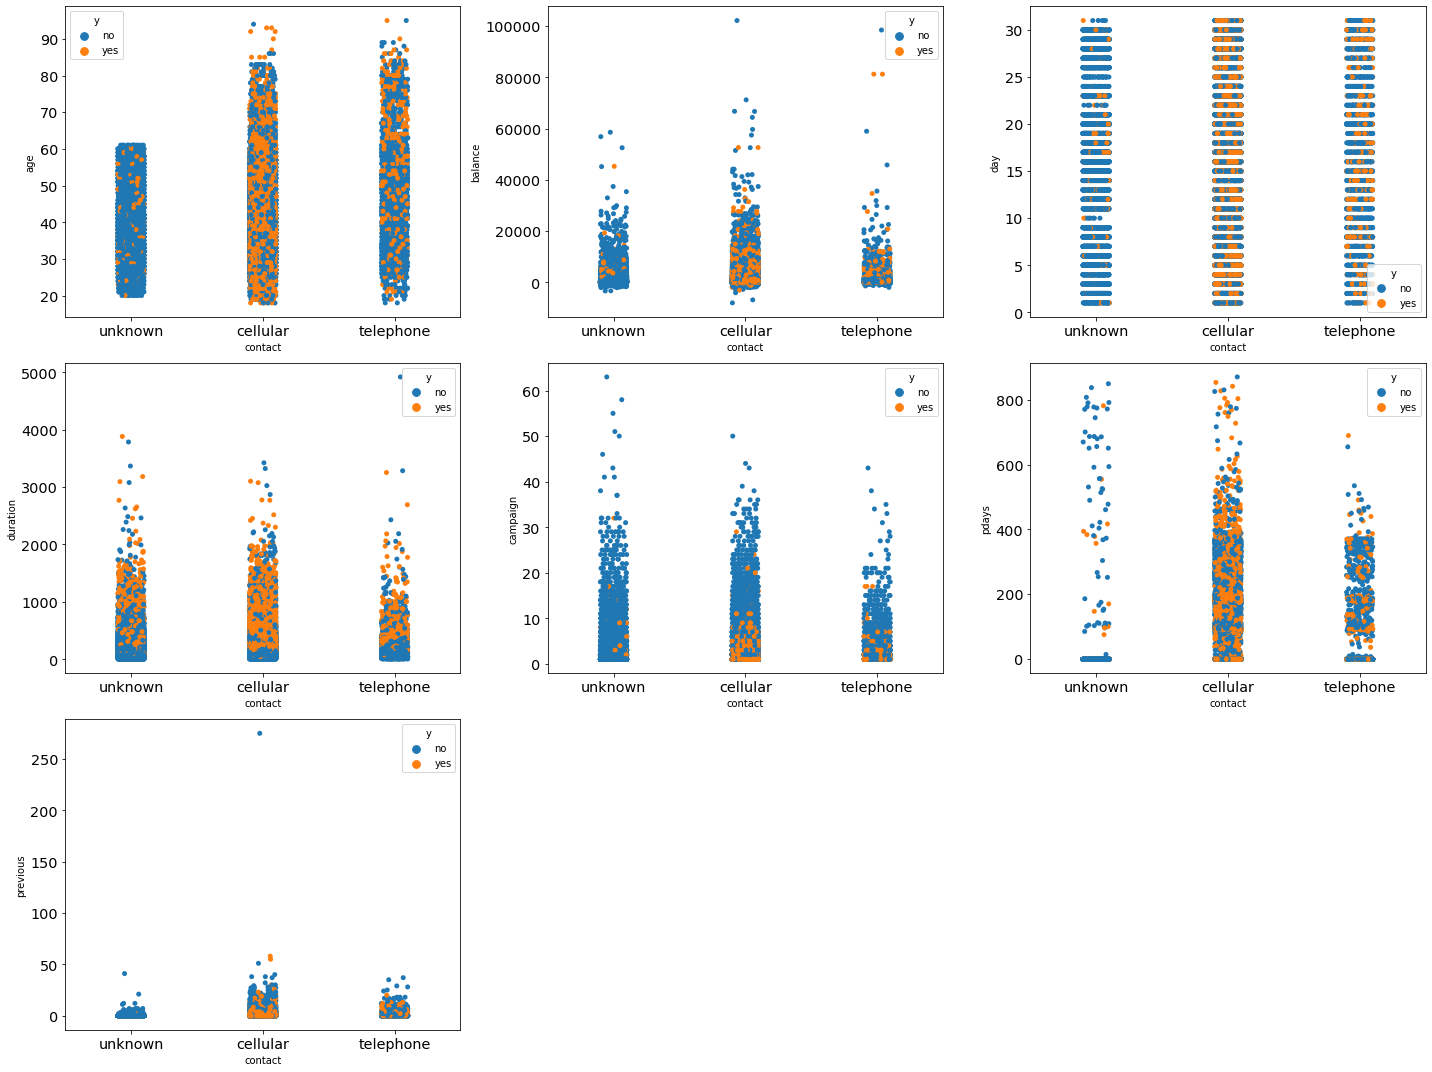

In [ ]:
# Persebaran setiap kolom vs Contact
fig = plt.figure(figsize=(20, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=num[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()